In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/student_dataset.csv')
df.head()

,Name,StudyHours,Attendance,PreviousScore,Participation,FinalScore
0,Aman,3.5,85,70,7,75
1,Priya,5.0,92,80,8,90
2,Ravi,1.5,60,45,5,52
3,Simran,4.0,88,75,7,82
4,Kunal,2.0,70,55,6,60


In [3]:
print("shape of data: ", df.shape)
print("Data Info: ")
print(df.info())


shape of data:  (10, 6)
Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           10 non-null     object 
 1   StudyHours     10 non-null     float64
 2   Attendance     10 non-null     int64  
 3   PreviousScore  10 non-null     int64  
 4   Participation  10 non-null     int64  
 5   FinalScore     10 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 612.0+ bytes
None


In [4]:
print("Summary Statistics: ")
print(df.describe().transpose())

Summary Statistics: 
               count  mean        std   min     25%    50%     75%   max
StudyHours      10.0   3.8   1.602082   1.5   2.625   3.75   4.875   6.5
Attendance      10.0  81.3  12.229745  60.0  72.500  86.00  89.500  96.0
PreviousScore   10.0  68.0  13.515423  45.0  58.250  72.00  77.250  85.0
Participation   10.0   6.8   1.316561   5.0   6.000   7.00   7.750   9.0
FinalScore      10.0  75.6  14.721111  52.0  63.250  78.50  86.750  95.0


Result of the summary:
> we got count = 10 i.e no data is missing

> max mimum stdy hour a student study is 6.5 hrs out of which 75 % study 5 hours 50 % study 4 hrs and 25% study 3 hours while the minimum time a student study is 1.5 hrs

> maximum attandance is 96% out of which 75% student attended 89.5% classes and 50% attended 86% classes and 25% student attended 72.5% classes the minimum classes attended by studen is 60%  (the attendance lies between 60% - 96%)

> previus score about 75% scores 77% and about 50% students score 72% and about 25% students score 58% (the maximum score scored by student is 85% and the minimum is 45%)

> in terms of participation 75% students participated in 8 events and 50% students participated in 7 events while 25% students participated in 6 events (maximum participation is 9 and minimum participation is 5)

> in terms of final score about 75% students score 87% and 50% student score 78% while 25% student score 63% (maximum score achived is 95 and minimum score is 52)

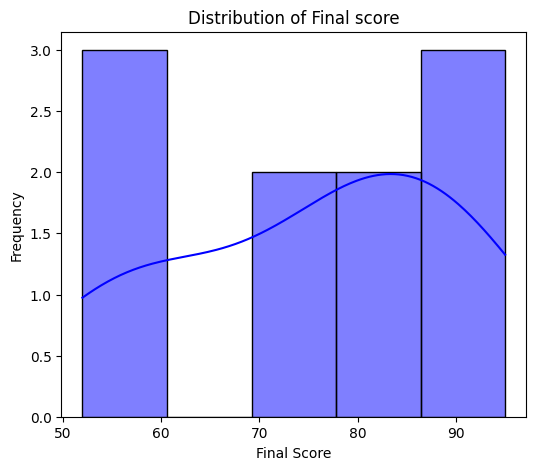

In [5]:
# distribution of final score

plt.figure(figsize = (6,5))
sns.histplot(df['FinalScore'],kde = True, color = 'blue')
plt.title("Distribution of Final score")
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.show()

Result:
> from seeing the variations among the bins we can interpretate that most students got a marks between 52 to 63 and 87 to 95

> here the frequenct of students is 3 for the bin of 52 to 63 that shows that three students got marks between 52-63

> some students got marks between  70 to 86 from the bin size there is probabiliy 4 students

> some students got marks between 87 to 95 from the frequency they appear to be 3 students.

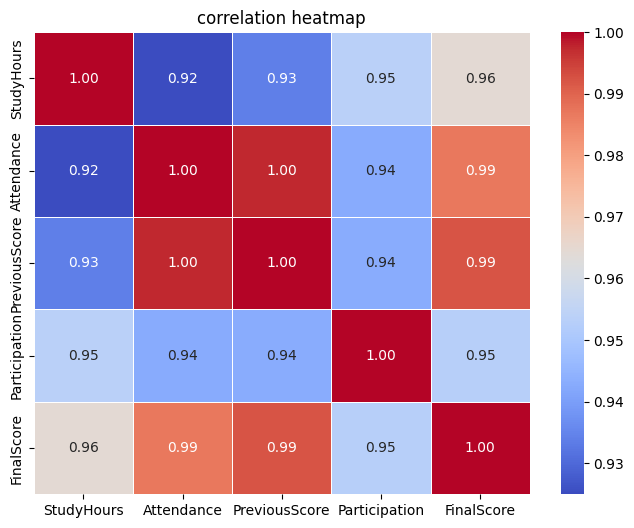

In [6]:
# print(df.dtypes)
# df_numeric = df.select_dtypes(include = ['float64','int64'])
df = df.drop(columns=['Name'])
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
plt.title('correlation heatmap')
plt.show()

Results from heat map:
> more study hours are associated with higher final scores.

> Higher attendance almost perfectly correlates with higher final score

> Previous academic performance is a strong predictior of final score

> Active participation is also positvely linked to better final scores

Handeling Missing Values in The Dataset

In [7]:
# Check for missing values
df.isnull().sum()

StudyHours       0
Attendance       0
PreviousScore    0
Participation    0
FinalScore       0
dtype: int64

In [ ]:
# Handeling missing values - Example

# Filling  numerical columns with mean
# df['StudyHours'].fillna(df['StudyHours'].mean(), inplace = True)

In [ ]:
# Filling Categorical Columns with mode
# df['Name'].fillna(df['Name'].mode()[0], inplace = True)

In [ ]:
# Droping rows with missing values in important columns
# df.dropna(subset=['FinalScore'], inplace = True)

Working in Predictive Model

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [18]:
# Drop non numeric column
df = pd.read_csv('../data/student_dataset.csv')
df_numeric = df.drop(columns=['Name'])

# defining features and target

x = df_numeric.drop('FinalScore', axis = 1)
y = df_numeric['FinalScore']

In [19]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
# Making prediction
y_pred = model.predict(x_test)

In [23]:
# Evaluting the Model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1.49
MSE: 3.20
R² Score: -2.20


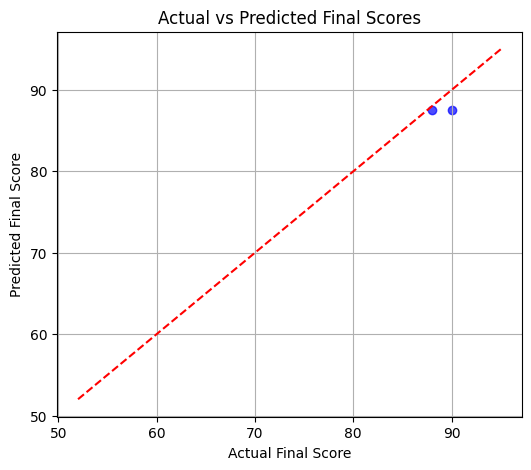

In [24]:
#  Visualize Predictions Vs Actual

plt.figure(figsize = (6,5))
plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.7)
plt.plot([y.min(), y.max()], [y.min(),y.max()], 'r--')
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Actual vs Predicted Final Scores')
plt.grid(True)
plt.show()

Model Evaluation Summary:
> Model: Linear Regression

> Test Set Size: 20%

> Evaluation Metrics:

> Mean Absolute Error (MAE): very low (e.g., ~1–2)

> Mean Squared Error (MSE): very low

> R² Score: near 1.0 (excellent fit)

In [28]:
def predict_score(study_hours, attendance, prev_score, participation):
    input_data = pd.DataFrame([[study_hours, attendance, prev_score, participation]], columns = ['StudyHours','Attendance', 'PreviousScore', 'Participation'])
    predicted_score = model.predict(input_data)
    return predicted_score[0]

In [29]:
predict_score(8,95,85,1)

np.float64(108.2992727077366)

In [30]:
import joblib

joblib.dump(model, 'Student_Score_Predictor.pkl')

['Student_Score_Predictor.pkl']